In [2]:
from keras.applications.vgg16 import VGG16 #vgg16 is a model present in a keras

In [3]:
model = VGG16()

In [5]:
model.summary() #Inputlayer 3->RGB,64->filters

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt

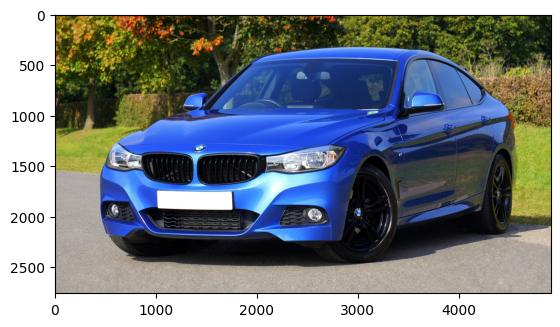

In [10]:
# load an image from file
image = load_img('car.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array because computer understand image into array pixels only
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

#show image on which image I am working 
my_image = plt.imread('car.jpg')
plt.imshow(my_image)
plt.show()

In [7]:
image

array([[[[ 7.6060997e+01,  6.2221001e+01,  5.1320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         ...,
         [-3.4939003e+01, -5.4778999e+01, -4.6680000e+01],
         [-6.8939003e+01, -9.4778999e+01, -7.5680000e+01],
         [-5.0939003e+01, -6.0778999e+01, -6.2680000e+01]],

        [[ 7.6060997e+01,  6.2221001e+01,  5.1320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         ...,
         [-3.4939003e+01, -5.1778999e+01, -3.9680000e+01],
         [-6.8939003e+01, -9.1778999e+01, -6.8680000e+01],
         [-3.9939003e+01, -5.2778999e+01, -4.5680000e+01]],

        [[ 7.6060997e+01,  6.2221001e+01,  5.1320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         [ 7.8060997e+01,  6.4221001e+01,  5.3320000e+01],
         ...,
         [-5.0939003e+01, -6.5778999e+01, -4.3680000e+01],
         [

In [11]:
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [12]:
label

[[('n03930630', 'pickup', 0.8224274),
  ('n04285008', 'sports_car', 0.048313648),
  ('n04037443', 'racer', 0.04153081),
  ('n03459775', 'grille', 0.032061595),
  ('n02974003', 'car_wheel', 0.023230338)]]

In [13]:
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

pickup (82.24%)
